In [42]:
import os
import pandas as pd
# import matplotlib.pyplot as plt
import csv
import numpy as np
import plotly.express as px
import plotly.graph_objects as go #this will be to create the subplot tabling

#figure out how to read direct from DB instead of CSV
#subtables = min, max, average, list of outliers from min/max spec, %in spec, #compliant = yes or no
#figure out how to loop through and create height/ weight tables at once  
#figure out how to loop through and create all tables at once
#do we want to convert the pull as pulling only a query of the single product instead of a query of the whole table 


In [39]:
#WEIGHT-- Relevant Dashboard information 

# Specify the file paths
file_path1 = '../data/cleaned/generic_butcher_cleaned.csv'
file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

# Read the CSV files into DataFrames
df = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Adjust decimal point that were obvious errors
df['measured_weight'] = df['measured_weight'].apply(lambda x: x * 0.01 if x > 50 else x)

# Merge the two dataframes on product_name to get the specs in the main dataframe
df = df.merge(df2[['product_name', 'weight_min', 'weight_max']], on='product_name', how='left')

# Group by product_name and calculate relevant metrics
grouped = df.groupby('product_name').agg(
    Count=('measured_weight', 'size'),
    Min_Weight=('measured_weight', 'min'),
    Max_Weight=('measured_weight', 'max'),
    Average_Weight=('measured_weight', 'mean')
).reset_index()

# Calculate additional metrics
grouped['Pct_In_Spec'] = df.groupby('product_name').apply(
    lambda x: (x['measured_weight'].between(x['weight_min'], x['weight_max'])).mean() * 100
).values

grouped['Count_Offspec'] = df.groupby('product_name').apply(
    lambda x: (~x['measured_weight'].between(x['weight_min'], x['weight_max'])).sum()
).values

grouped['Compliant'] = grouped['Pct_In_Spec'] > 95

# Format the Pct_In_Spec column
grouped['Pct_In_Spec'] = grouped['Pct_In_Spec'].apply(lambda x: f"{x:.2f}%")

# Rename columns for consistency
grouped.rename(columns={
    'product_name': 'Product',
    'Min_Weight': 'Min Weight',
    'Max_Weight': 'Max Weight',
    'Average_Weight': 'Average Weight',
    'Pct_In_Spec': 'Pct In Spec',
    'Count_Offspec': 'Count Offspec'
}, inplace=True)

grouped


,Product,Count,Min Weight,Max Weight,Average Weight,Pct In Spec,Count Offspec,Compliant
0,10 oz Sirloin A,695,9.140,11.00,9.764863,99.28%,5,True
1,11 oz Sirloin B,817,10.000,11.30,10.683366,98.29%,14,True
2,11 oz Sirloin C,2062,9.980,11.86,10.959171,98.01%,41,True
3,13 oz Ribeye Tail A,2181,1.203,18.08,13.113046,97.94%,45,True
4,16 oz Dry Age Ribeye A,765,14.020,18.34,15.851085,98.30%,13,True
5,16 oz Prime Strip A,220,14.180,17.74,15.864455,96.36%,8,True
6,16 oz Ribeye Tail A,1432,14.520,17.90,15.996321,97.91%,30,True
7,16 oz Strip A,586,14.140,18.10,16.564078,96.25%,22,True
8,18 oz Ribeye A,1401,15.520,20.92,18.606023,95.36%,65,True
9,20 oz Prime Ribeye A,122,19.080,21.80,20.774918,73.77%,32,False


In [46]:
# Specify the file paths
file_path1 = '../data/cleaned/generic_butcher_cleaned.csv'
file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

# Read the CSV files into DataFrames
df = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Merge the two dataframes on product_name to get the specs in the main dataframe
df = df.merge(df2[['product_name', 'height_min', 'height_max']], on='product_name', how='left')

# Adjust decimal point that were obvious errors for measured_height if necessary
# Uncomment the line below if there's a similar issue with height as with weight
# df['measured_height'] = df['measured_height'].apply(lambda x: x * 0.01 if x > 50 else x)

# Group by product_name and calculate relevant metrics for height
grouped_height = df.groupby('product_name').agg(
    Count_Height=('measured_height', 'size'),
    Min_Height=('measured_height', 'min'),
    Max_Height=('measured_height', 'max'),
    Average_Height=('measured_height', 'mean')
).reset_index()

# Calculate additional height metrics
grouped_height['Pct_In_Spec_Height'] = df.groupby('product_name').apply(
    lambda x: (x['measured_height'].between(x['height_min'], x['height_max'])).mean() * 100
).values

grouped_height['Count_Offspec_Height'] = df.groupby('product_name').apply(
    lambda x: (~x['measured_height'].between(x['height_min'], x['height_max'])).sum()
).values

grouped_height['Compliant_Height'] = grouped_height['Pct_In_Spec_Height'] > 95

# Format the Pct_In_Spec_Height column
grouped_height['Pct_In_Spec_Height'] = grouped_height['Pct_In_Spec_Height'].apply(lambda x: f"{x:.2f}%")

# Rename columns for consistency
grouped_height.rename(columns={
    'product_name': 'Product',
    'Min_Height': 'Min Height',
    'Max_Height': 'Max Height',
    'Average_Height': 'Average Height',
    'Pct_In_Spec_Height': 'Pct In Spec Height',
    'Count_Offspec_Height': 'Count Offspec Height',
    'Compliant_Height': 'Compliant Height'
}, inplace=True)

# Display the final height table
grouped_height

,Product,Count_Height,Min Height,Max Height,Average Height,Pct In Spec Height,Count Offspec Height,Compliant Height
0,10 oz Sirloin A,695,1.056760,1.83688,1.378185,99.28%,5,True
1,11 oz Sirloin B,817,1.114460,1.88710,1.373452,99.51%,4,True
2,11 oz Sirloin C,2062,1.050920,2.40982,1.422922,96.56%,71,True
3,13 oz Ribeye Tail A,2181,0.701302,1.68081,1.016365,100.00%,0,True
4,16 oz Dry Age Ribeye A,765,0.993740,1.97211,1.293364,100.00%,0,True
5,16 oz Prime Strip A,220,1.048440,2.17817,1.479292,100.00%,0,True
6,16 oz Ribeye Tail A,1432,0.893239,1.78191,1.186122,100.00%,0,True
7,16 oz Strip A,586,0.826419,1.47993,1.097839,100.00%,0,True
8,18 oz Ribeye A,1401,0.747236,3.93643,1.071697,99.71%,4,True
9,20 oz Prime Ribeye A,122,0.967064,1.95839,1.302482,100.00%,0,True


In [45]:
#WEIGHT-- SUBPLOT TABLE
#TEST product: "8 oz T Tenderloin A"
#SPECIFY product_name = "8 oz T Tenderloin A"
product_name = "8 oz T Tenderloin A"

# Specify the file path
file_path = '../data/cleaned/generic_butcher_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path2)

# Copy data to preserve original dataset
product_data = df.loc[df["product_name"] == product_name]
product = product_data.copy()

# Adjust decimal point that were obvious errors
product['measured_weight'] = product['measured_weight'].apply(lambda x: x * 0.01 if x > 50 else x)

#Find relevant subplot data
weight_min_spec = df2.loc[df2['product_name'] == product_name, 'weight_min'].iloc[0]
weight_max_spec = df2.loc[df2['product_name'] == product_name, 'weight_max'].iloc[0]
weight_avg = np.mean(product['measured_weight'])
count_wt = len(product['measured_weight'])
min_wt = np.min(product['measured_weight'])
max_wt = np.max(product['measured_weight'])
in_spec_wt = product['measured_weight'].apply(lambda x: weight_min_spec <= x <= weight_max_spec)
percent_in_spec_wt = (np.sum(in_spec_wt)/np.sum(count_wt))*100
out_spec_val_wt = product.loc[~in_spec_wt, 'measured_weight'].values
count_oos_wt = len(out_spec_val_wt)
compliance = percent_in_spec_wt > 95.00


# Create dataframe for subplot weight information
subplot_weight = pd.DataFrame({
    'Product': [product_name],
    'Count': [count_wt],
    'Min Weight': [min_wt],
    'Max Weight': [max_wt],
    'Average Weight': [weight_avg],
    'Pct In Spec': f"{percent_in_spec_wt:.2f}%",
    'Count Offspec': [count_oos_wt],
    'Compliant': [compliance]
})

subplot_weight.T


,0
Product,8 oz T Tenderloin A
Count,1908
Min Weight,7.16
Max Weight,11.1
Average Weight,8.035451
Pct In Spec,98.69%
Count Offspec,25
Compliant,True


In [47]:
# Specify the product name
product_name = "8 oz T Tenderloin A"

# Specify the file paths
file_path = '../data/cleaned/generic_butcher_cleaned.csv'
file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

# Read the CSV files into DataFrames
df = pd.read_csv(file_path)
df2 = pd.read_csv(file_path2)

# Copy data to preserve original dataset
product_data = df.loc[df["product_name"] == product_name]
product = product_data.copy()

# Adjust decimal point that were obvious errors for height
product['measured_height'] = product['measured_height'].apply(lambda x: x * 0.01 if x > 50 else x)

# Find relevant subplot data for height
height_min_spec = df2.loc[df2['product_name'] == product_name, 'height_min'].iloc[0]
height_max_spec = df2.loc[df2['product_name'] == product_name, 'height_max'].iloc[0]
height_avg = np.mean(product['measured_height'])
count_ht = len(product['measured_height'])
min_ht = np.min(product['measured_height'])
max_ht = np.max(product['measured_height'])
in_spec_ht = product['measured_height'].apply(lambda x: height_min_spec <= x <= height_max_spec)
percent_in_spec_ht = (np.sum(in_spec_ht) / count_ht) * 100
out_spec_val_ht = product.loc[~in_spec_ht, 'measured_height'].values
count_oos_ht = len(out_spec_val_ht)
compliance = percent_in_spec_ht > 95.00

# Create dataframe for subplot height information
subplot_height = pd.DataFrame({
    'Product': [product_name],
    'Count': [count_ht],
    'Min Height': [min_ht],
    'Max Height': [max_ht],
    'Average Height': [height_avg],
    'Pct In Spec': [f"{percent_in_spec_ht:.2f}%"],
    'Count Offspec': [count_oos_ht],
    'Compliant': [compliance]
})

# Display the transposed dataframe
subplot_height.T

,0
Product,8 oz T Tenderloin A
Count,1908
Min Height,0.98796
Max Height,3.38117
Average Height,1.900024
Pct In Spec,100.00%
Count Offspec,0
Compliant,True


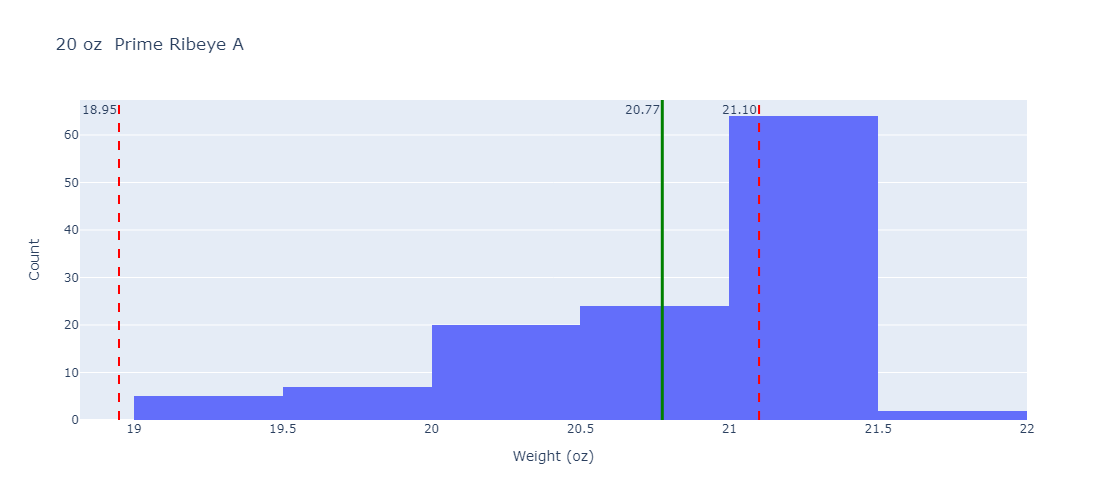

In [44]:
#WEIGHT
#TEST product: "8 oz T Tenderloin A"
#SPECIFY product_name = "8 oz T Tenderloin A"
product_name = "20 oz  Prime Ribeye A"

# Specify the file path
file_path = '../data/cleaned/generic_butcher_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path2)

# Copy data to preserve original dataset
product_data = df.loc[df["product_name"] == product_name]
product = product_data.copy()

# Adjust decimal point that were obvious errors
product['measured_weight'] = product['measured_weight'].apply(lambda x: x * 0.01 if x > 50 else x)

# Determine bin min and max in a readable format
min_wt = np.min(product['measured_weight'])
max_wt = np.max(product['measured_weight'])
binmin_wt = np.floor(min_wt)
binmax_wt = np.ceil(max_wt)

# Determine spec goal posts
weight_min_spec = df2.loc[df2['product_name'] == product_name, 'weight_min'].iloc[0]
weight_max_spec = df2.loc[df2['product_name'] == product_name, 'weight_max'].iloc[0]
weight_avg = np.mean(product['measured_weight'])

# Created bins based on the quarter ounce
num_bins_wt = int((binmax_wt - binmin_wt) * 1/.25)

# Pulls measured weight data for the x value of the histogram
product_weights = product['measured_weight']

# Create the histogram using Plotly Express
fig = px.histogram(product, x='measured_weight', nbins=num_bins_wt, title=product_name)

# Add vertical lines for average, min spec, and max spec using add_vline
fig.add_vline(x=weight_avg, line=dict(color="green", width=3), annotation_text=f"{weight_avg:.2f}", annotation_position="top left")
fig.add_vline(x=weight_min_spec, line=dict(color="red", width=2, dash='dash'), annotation_text= f"{weight_min_spec:.2f}", annotation_position="top left")
fig.add_vline(x=weight_max_spec, line=dict(color="red", width=2, dash='dash'), annotation_text=f"{weight_max_spec:.2f}", annotation_position="top left")

# Update xaxis and yaxis labels
fig.update_layout(
    width=1000,
    height=500,
    xaxis_title='Weight (oz)',
    yaxis_title='Count',
    showlegend=False
)

# Show the plot
fig.show()


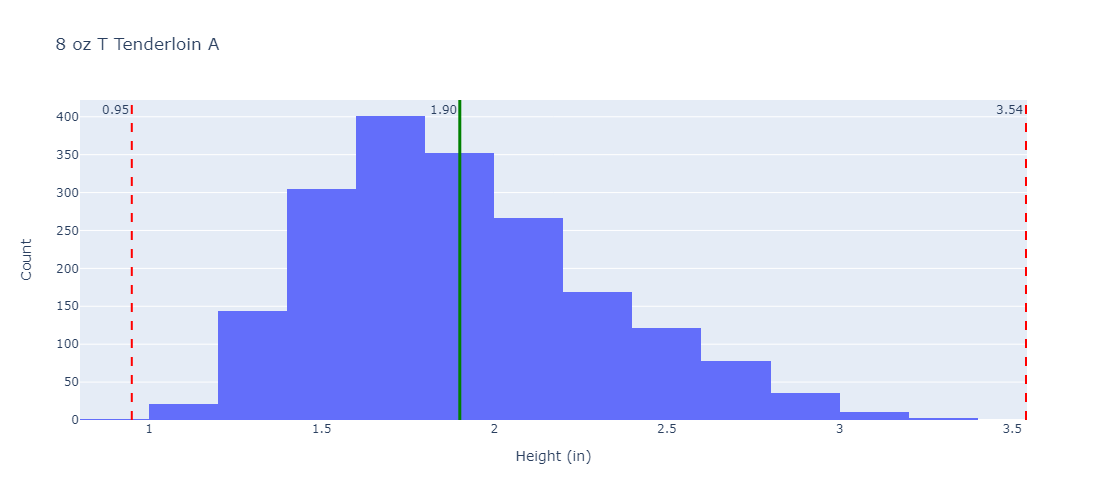

In [24]:
#THICKNESS (NOTE-- min thick needs to be removed at cleaning stage)
#TEST product: "8 oz T Tenderloin A"
# Specify the product name
product_name = "8 oz T Tenderloin A"

# Specify the file path
file_path = '../data/cleaned/generic_butcher_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path2)

# Copy data to preserve original dataset
product_data = df.loc[df["product_name"] == product_name]
product = product_data.copy()

# Determine bin min and max in a readable format
min_ht = np.min(product['measured_height'])
max_ht = np.max(product['measured_height'])
binmin_ht = np.floor(min_ht)
binmax_ht = np.ceil(max_ht)

# Determine spec goal posts
height_min_spec = df2.loc[df2['product_name'] == product_name, 'height_min'].iloc[0]
height_max_spec = df2.loc[df2['product_name'] == product_name, 'height_max'].iloc[0]

# Calculate average height
height_avg = np.mean(product['measured_height'])

# Created bins based on the 0.1 inch increments
num_bins_ht = int((binmax_ht - binmin_ht) * 1/.1)

# Pulls measured height data for the x value of the histogram
product_heights = product['measured_height']

# Create the histogram using Plotly Express
fig = px.histogram(product, x='measured_height', nbins=num_bins, title=product_name)

# Add vertical lines for average, min spec, and max spec using add_vline
fig.add_vline(x=height_avg, line=dict(color="green", width=3), annotation_text=f"{height_avg:.2f}", annotation_position="top left")
fig.add_vline(x=height_min_spec, line=dict(color="red", width=2, dash='dash'), annotation_text=f"{height_min_spec:.2f}", annotation_position="top left")
fig.add_vline(x=height_max_spec, line=dict(color="red", width=2, dash='dash'), annotation_text=f"{height_max_spec:.2f}", annotation_position="top left")

# Update xaxis and yaxis labels
fig.update_layout(
    width=1000,
    height=500,
    xaxis_title='Height (in)',
    yaxis_title='Count',
    showlegend=False
)

# Show the plot
fig.show()